## 3. Attractive and Repulsive Potential Fields
This code creates a potential field combining attractive and repulsive forces.

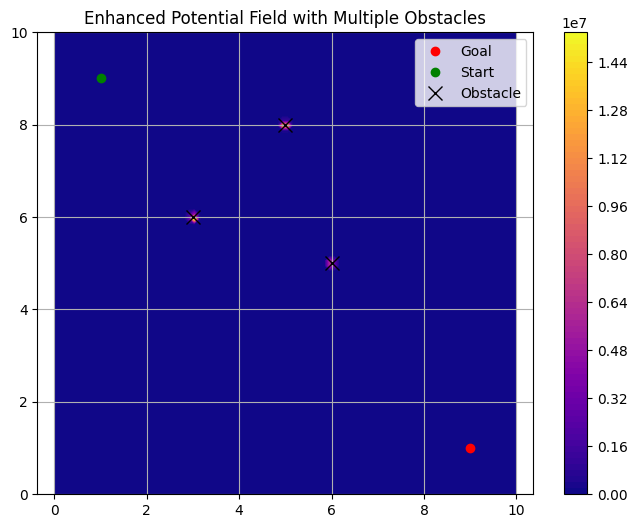

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
x, y = np.meshgrid(np.linspace(0, 10, 100), np.linspace(0, 10, 100))
goal = np.array([9, 1])
start = np.array([1, 9])

# Obstacles
obstacles = [np.array([3, 6]), np.array([6, 5]), np.array([5, 8])]
repulsive_scale = 100
repulsive_range = 1.5

# Attractive Potential
U_att = 2.0 * ((x - goal[0])**2 + (y - goal[1])**2)

# Repulsive Potential
U_rep = np.zeros_like(x)
for obs in obstacles:
    dist_sq = (x - obs[0])**2 + (y - obs[1])**2
    mask = dist_sq < repulsive_range**2
    with np.errstate(divide='ignore'):
        U_rep += np.where(mask, repulsive_scale * (1.0 / dist_sq - 1.0 / repulsive_range**2)**2, 0)

# Total potential
U = U_att + U_rep

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(x, y, U, levels=80, cmap='plasma')
plt.colorbar(contour)

# Plot goal and start
plt.plot(goal[0], goal[1], 'ro', label='Goal')
plt.plot(start[0], start[1], 'go', label='Start')

# Plot obstacles
for i, obs in enumerate(obstacles):
    plt.plot(obs[0], obs[1], 'kx', markersize=10, label='Obstacle' if i == 0 else None)

plt.title("Enhanced Potential Field with Multiple Obstacles")
plt.grid(True)
plt.axis('equal')
plt.legend(loc='upper right')
plt.show()
